<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron**

The Perceptron can be seen as one single unit of an **Artificial Neural Network (ANN)**. A perceptron is a simplified model of a biological neuron and it simulates the behavior of only one cell. 

Each cell receives an input. All these received signals are then weighted and summed up. If this summation reaches a certain threshold, then the cell delivers an output.

So, there are some intput features $(x_0, x_1, x_2, ..., x_m)$ which are multiplied by some weights $(w_0, w_1, w_2, ..., w_m)$ and then summed up $($$\sum$$)$. Then, an activation function is applied on the summation to get the final output class $(y)$. 


**Linear Model:** $f(w,b) = w^Tx +b$

**Activation Function:** g(z) = 1 if z $\geq \theta$, 0 otherwise

**Approximation:** $\hat{y} = g(f(w,b)) = g(w^Tx + b)$

**Perceptron update rule:** For each training sample $x_i$:
  *  $w := w + \Delta w $
  *  $\Delta w := \alpha \cdot (y_i - \hat{y_i}) \cdot x_i$
  *  $\alpha:$ learning rate in $[0, 1]$

### **Import Dataset**

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.linear_model import Perceptron

In [2]:
# load dataset
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (120, 2)
Sample of X: [-1.96601474 -8.59689627]
y:  (120,)
Sample of y: 0


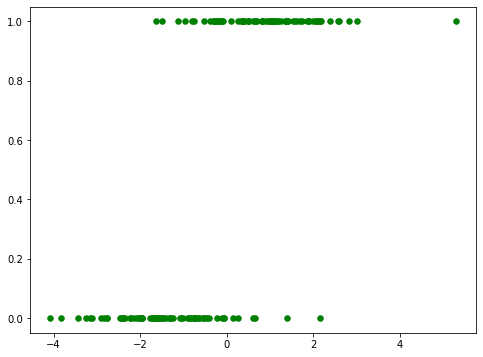

In [3]:
# plot data samples
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='g', s=30)
plt.show()

### **Perceptron from scratch**

In [4]:
class PerceptronModel:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [5]:
# train the model
p = PerceptronModel(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [6]:
# model accuracy
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

print('Accuracy: ', round(accuracy(y_test, predictions)*100, 2), '%')

Accuracy:  100.0 %


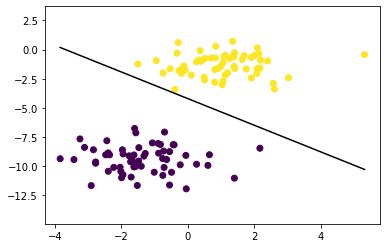

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

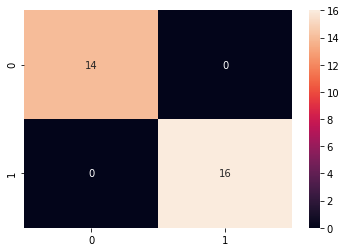

In [8]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [9]:
# classification report
print(classification_report(y, p.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



### **Perceptron using scikit-learn**

In [10]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), '%')

Accuracy: 100.0 %


**Testing on a different dataset (Digit dataset)**

In [18]:
# load dataset
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (1437, 64)
Sample of X: [ 0.  0.  0.  6. 15. 11.  2.  0.  0.  0.  6. 13.  4. 13.  5.  0.  0.  0.
  7. 11.  0. 13.  3.  0.  0.  0.  2. 15. 13.  7.  0.  0.  0.  3. 13. 12.
 16.  2.  0.  0.  0.  8. 15.  1.  9.  8.  0.  0.  0.  0.  7. 14.  8. 16.
  1.  0.  0.  0.  0.  5. 12. 16.  2.  0.]
y:  (1437,)
Sample of y: 8


In [20]:
# train the model
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), '%')

Accuracy: 95.28 %


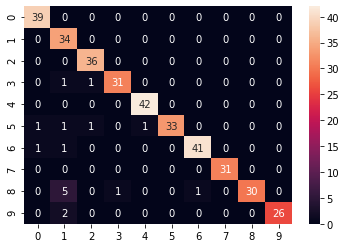

In [21]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [22]:
# classification report
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       178
           1       0.88      0.98      0.93       182
           2       0.97      1.00      0.98       177
           3       0.99      0.93      0.96       183
           4       0.97      1.00      0.99       181
           5       0.96      0.97      0.97       182
           6       0.99      0.98      0.98       181
           7       0.99      0.98      0.99       179
           8       0.96      0.90      0.93       174
           9       0.99      0.93      0.96       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797

